# LIBRARIES

In [1]:
#DATA 
import pandas as pd
import numpy as np
#VISUAL
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Merged = pd.read_excel(f'CleanData/Merged.xlsx')

In [12]:
Merged

,testo 160 IAQ_51616135_outdoor [ppm],testo 160 IAQ_51616135_outdoor [°C],testo 160 IAQ_51616135_outdoor [mbar],testo 160 IAQ_51616135_outdoor [%RH],testo 160 IAQ_51616135_outdoor [°C td],testo 160 IAQ_51616135_outdoor [g/m³],DateTime,testo 160 IAQ_51616142 [ppm],testo 160 IAQ_51616142 [°C],testo 160 IAQ_51616142 [mbar],testo 160 IAQ_51616142 [%RH],testo 160 IAQ_51616142 [°C td],testo 160 IAQ_51616142 [g/m³],Computer - kWatts,Plug Load (kWatts),Air Conditioner-kWatts,light + fan - kWatts
0,399.0,26.5,1007,54.1,16.5,13.6,2023-03-07 00:00:00,387.0,29.5,1008,47.4,17.1,14.0,0.0000,0.0,0.0,0.0
1,397.0,26.4,1007,53.5,16.2,13.3,2023-03-07 00:15:00,387.0,29.4,1008,47.5,17.1,14.0,0.0000,0.0,0.0,0.0
2,401.0,26.3,1007,54.4,16.4,13.5,2023-03-07 00:30:00,391.0,29.4,1008,47.5,17.1,14.0,0.0000,0.0,0.0,0.0
3,400.0,26.2,1007,53.5,16.0,13.2,2023-03-07 00:45:00,389.0,29.4,1008,47.5,17.0,13.9,0.0000,0.0,0.0,0.0
4,402.0,26.2,1007,52.5,15.8,13.0,2023-03-07 01:00:00,385.0,29.3,1008,47.3,17.0,13.9,0.0000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15609,243.0,18.2,1010,82.0,15.1,12.8,2024-01-01 22:45:00,344.0,20.9,1010,70.5,15.4,12.9,0.0206,0.0,0.0,0.0
15610,250.0,18.2,1010,82.0,15.1,12.8,2024-01-01 23:00:00,338.0,20.9,1010,70.6,15.4,12.9,0.0207,0.0,0.0,0.0
15611,255.0,18.1,1010,82.3,15.0,12.7,2024-01-01 23:15:00,346.0,20.9,1010,70.6,15.4,12.9,0.0205,0.0,0.0,0.0
15612,256.0,18.1,1010,82.6,15.1,12.8,2024-01-01 23:30:00,346.0,20.9,1010,70.6,15.4,12.9,0.0206,0.0,0.0,0.0


In [3]:
for col in Merged.columns:
    print(col)

testo 160 IAQ_51616135_outdoor [ppm]
testo 160 IAQ_51616135_outdoor [°C]
testo 160 IAQ_51616135_outdoor [mbar]
testo 160 IAQ_51616135_outdoor [%RH]
testo 160 IAQ_51616135_outdoor [°C td]
testo 160 IAQ_51616135_outdoor [g/m³]
DateTime
testo 160 IAQ_51616142 [ppm]
testo 160 IAQ_51616142 [°C]
testo 160 IAQ_51616142 [mbar]
testo 160 IAQ_51616142 [%RH]
testo 160 IAQ_51616142 [°C td]
testo 160 IAQ_51616142 [g/m³]
Computer - kWatts
Plug Load (kWatts)
Air Conditioner-kWatts
light + fan - kWatts 


# BOX PLOTS

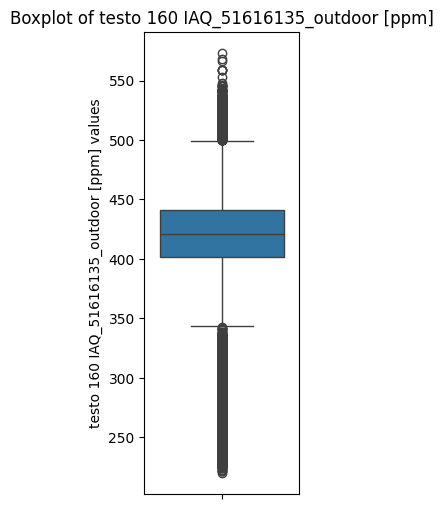

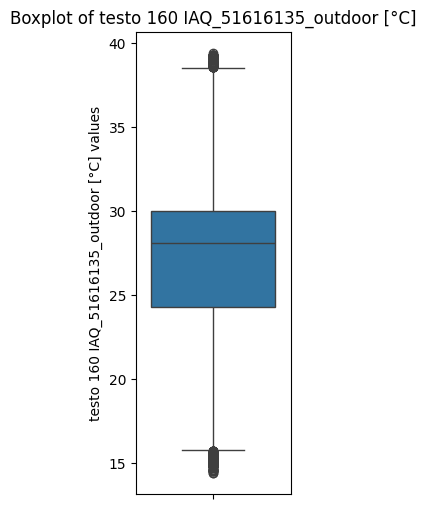

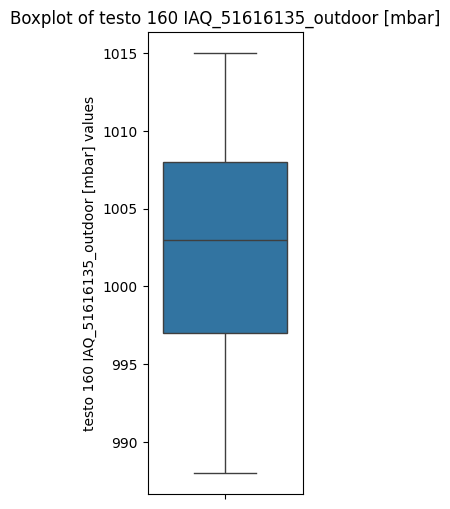

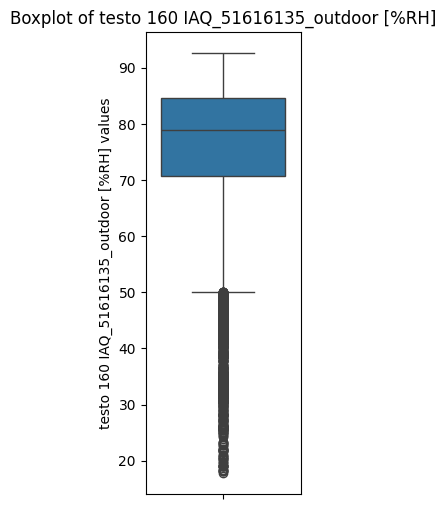

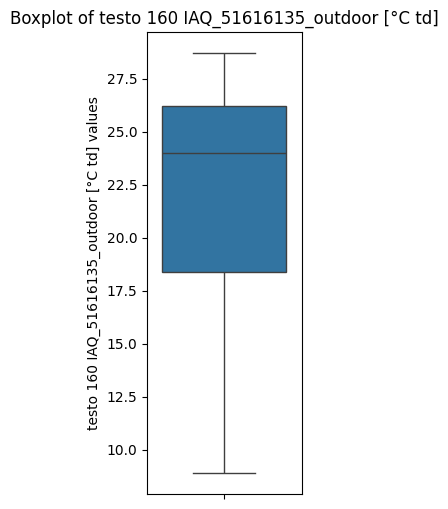

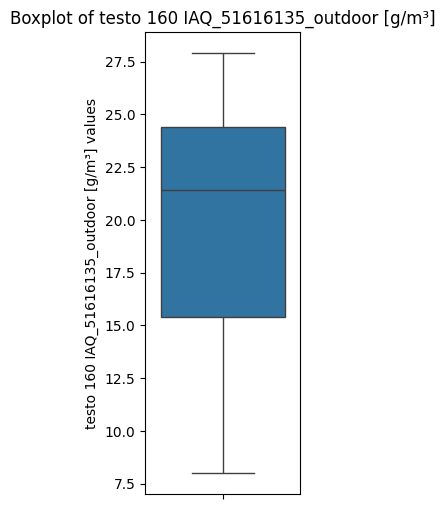

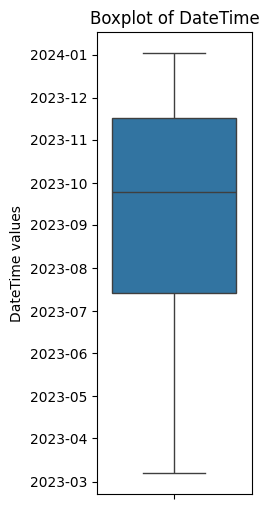

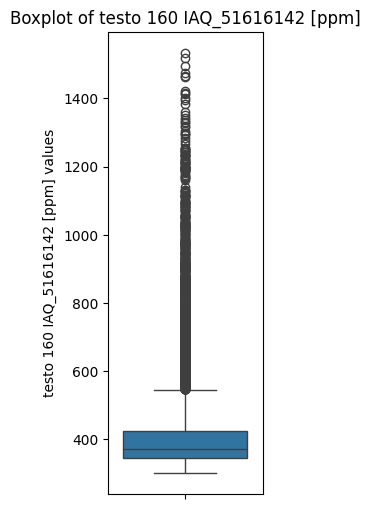

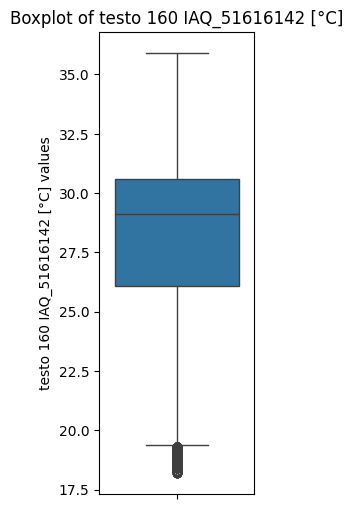

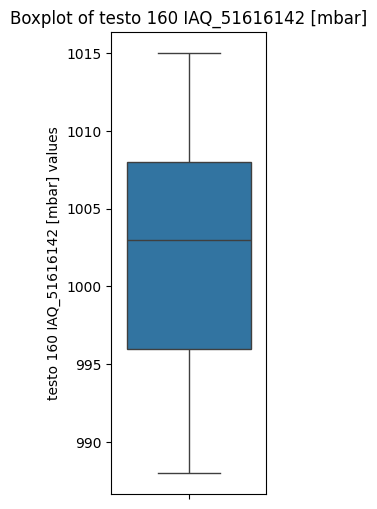

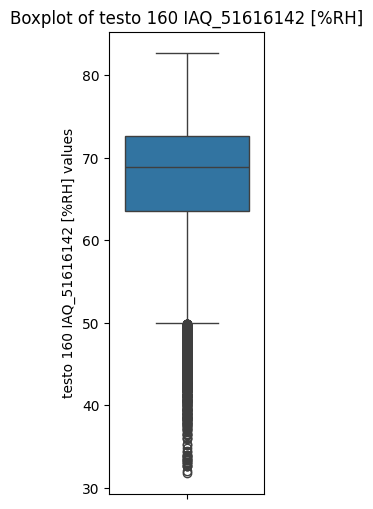

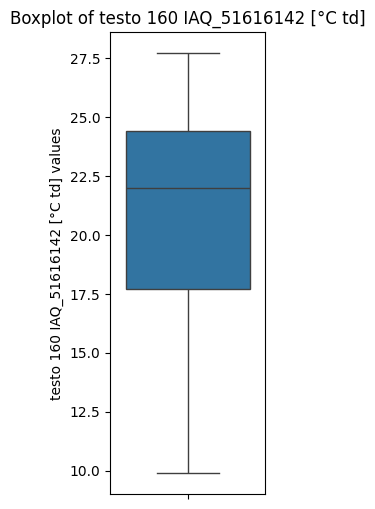

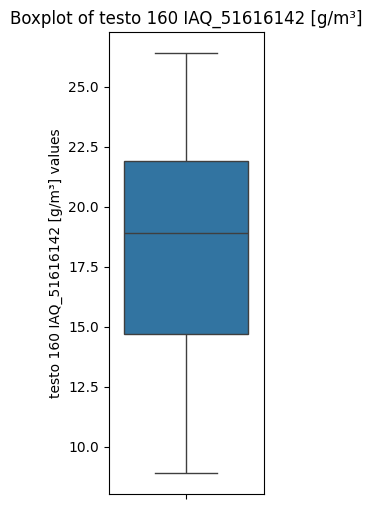

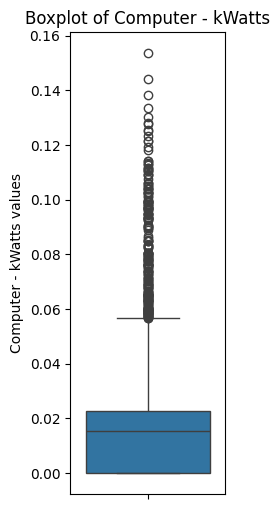

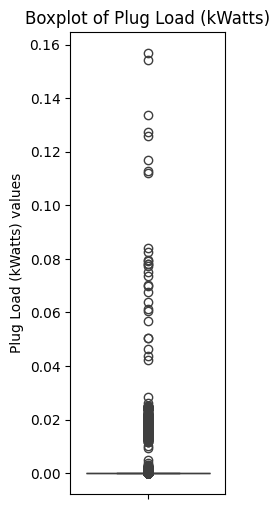

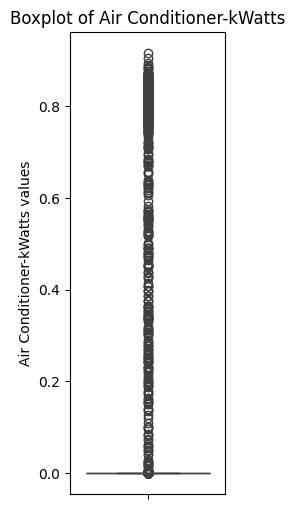

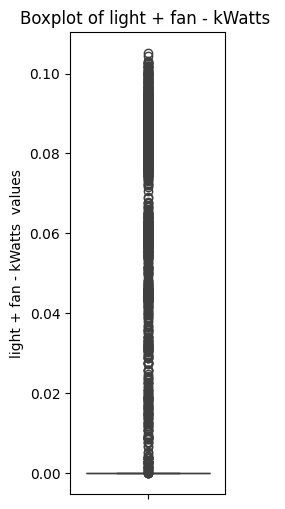

In [16]:
for col in Merged.columns:
    plt.figure(figsize=(2, 6))
    sns.boxplot( y=Merged[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(f'{col} values')
    plt.show()

# MONTHLY VARIATION

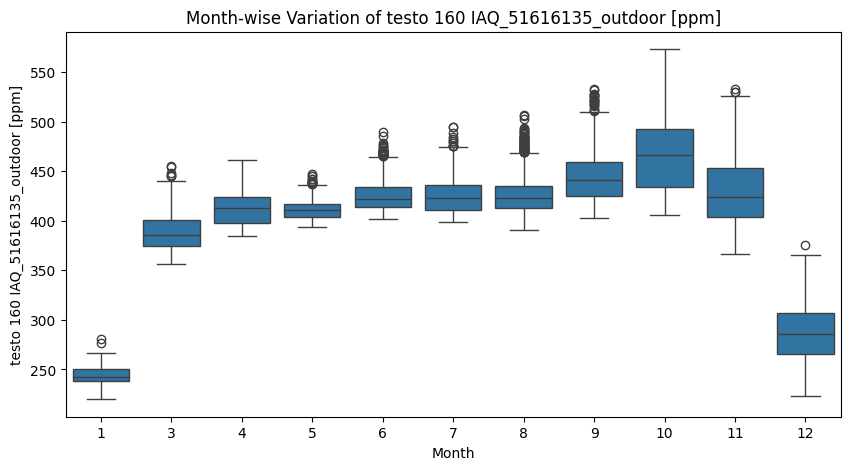

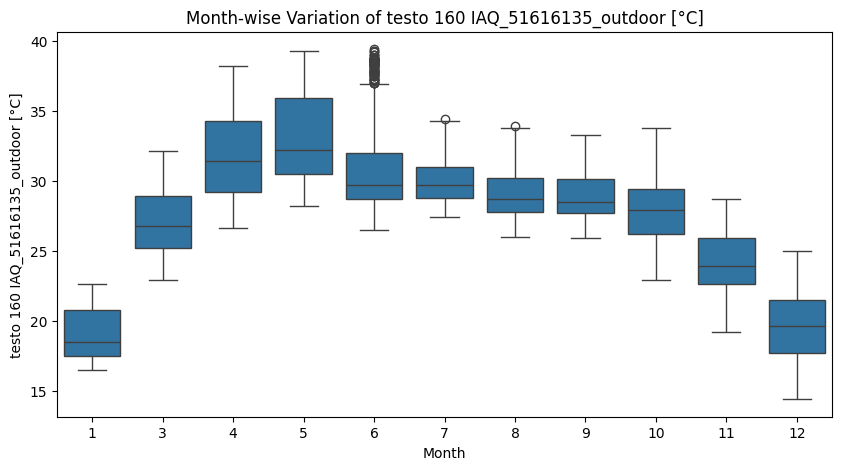

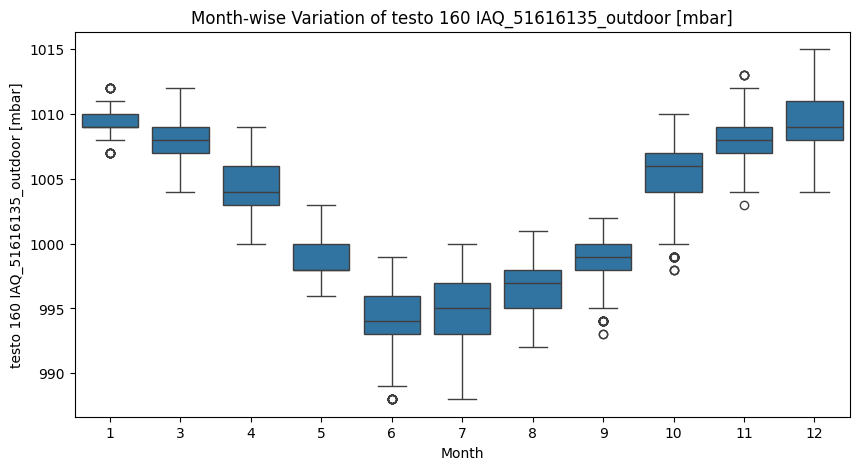

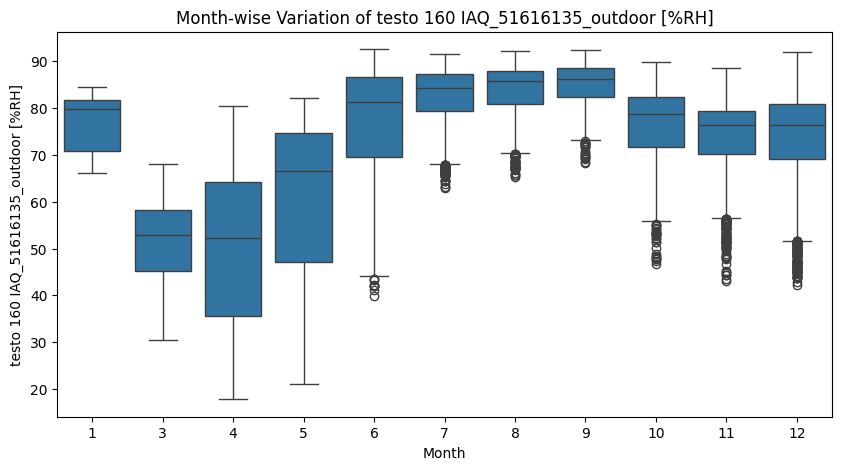

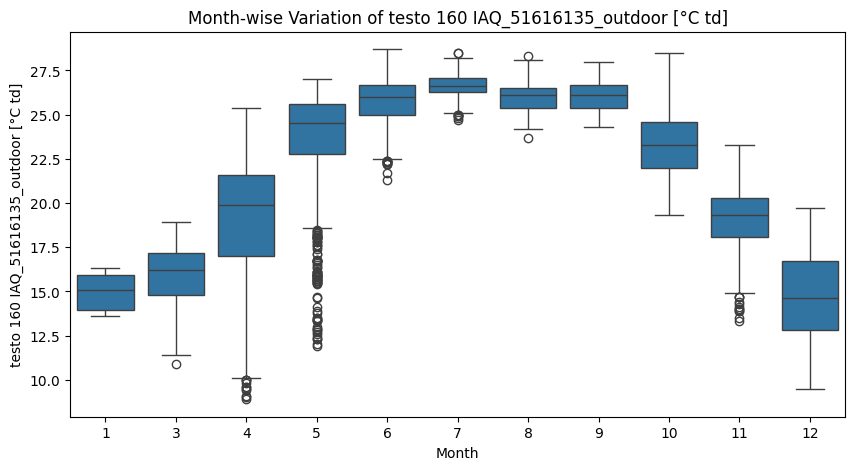

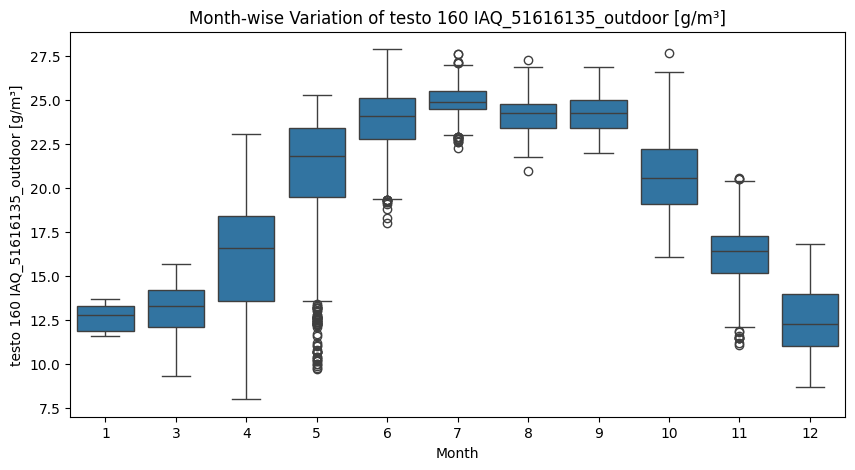

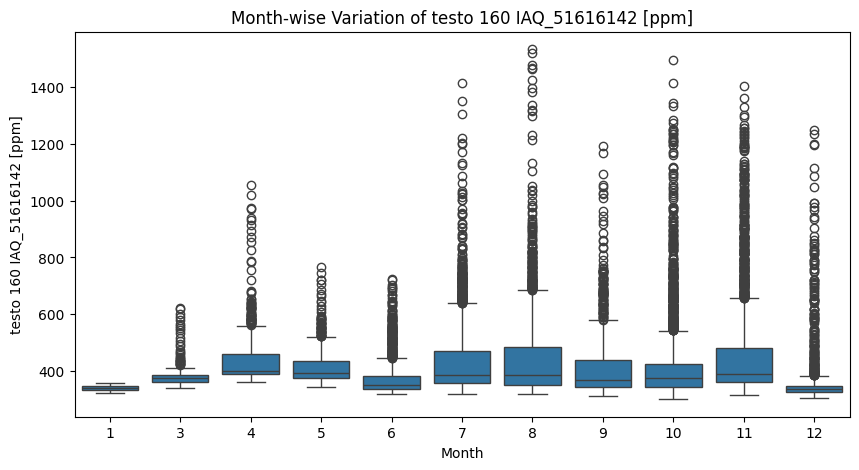

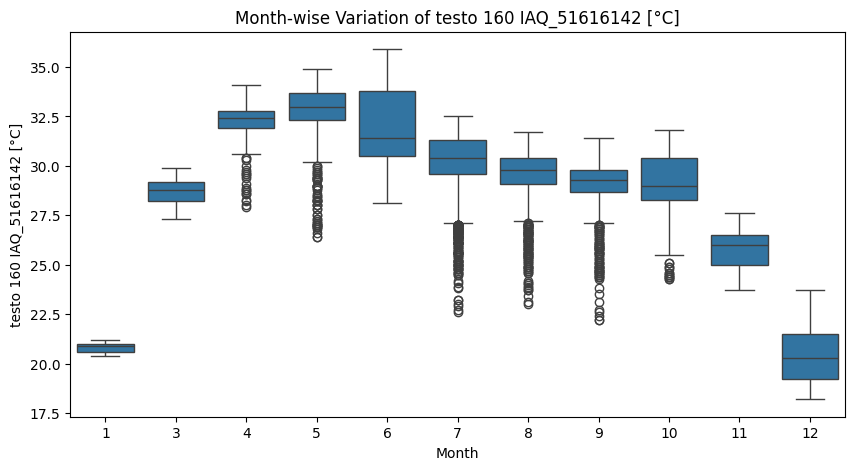

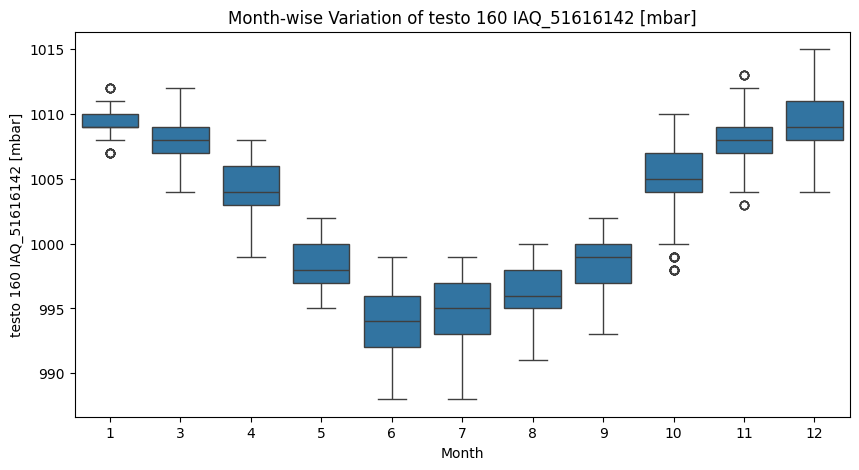

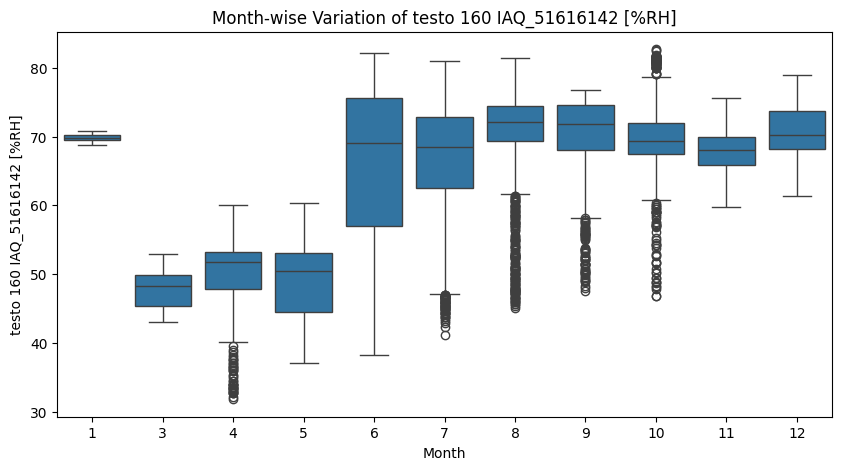

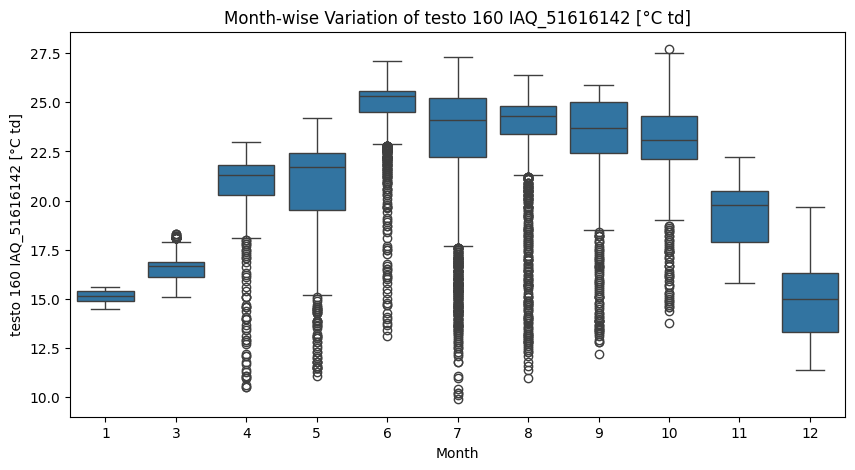

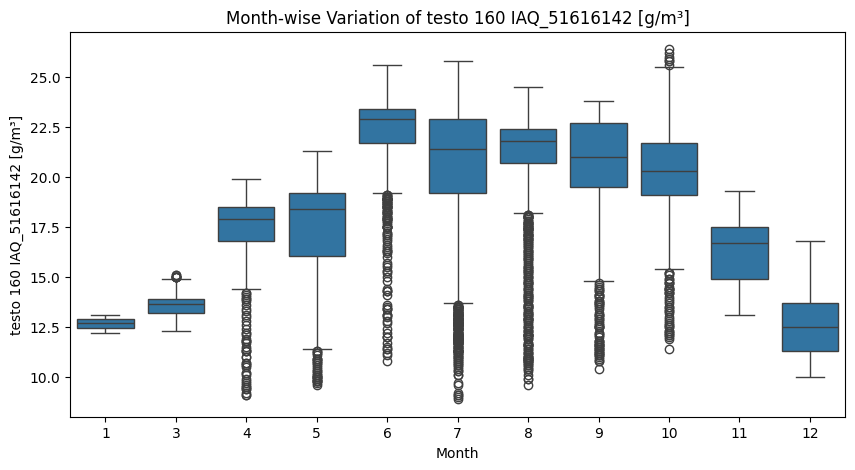

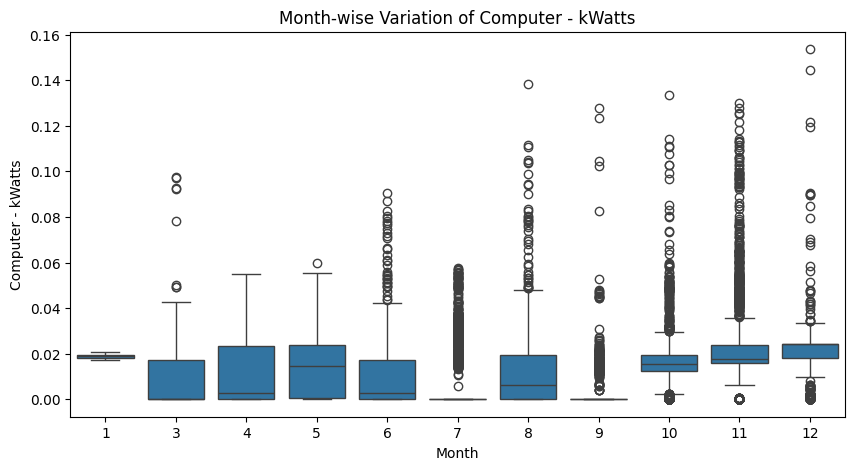

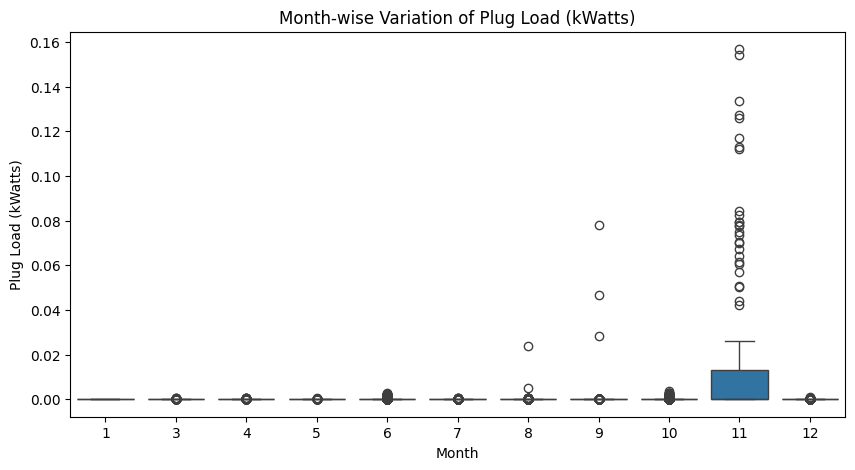

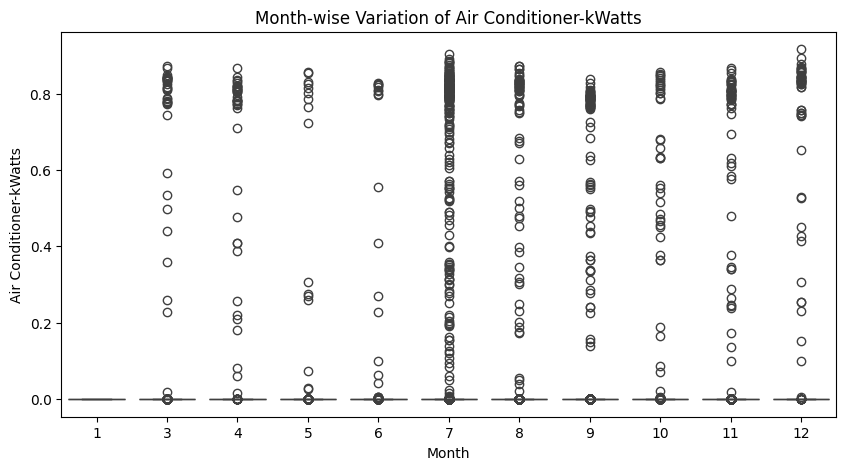

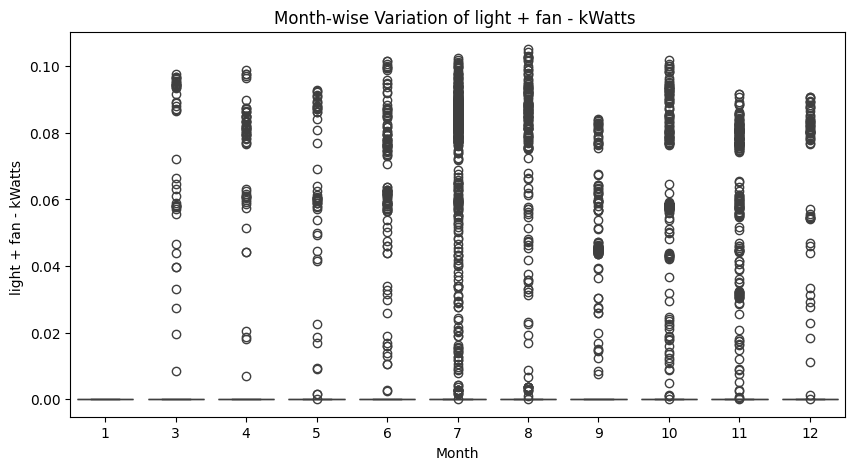

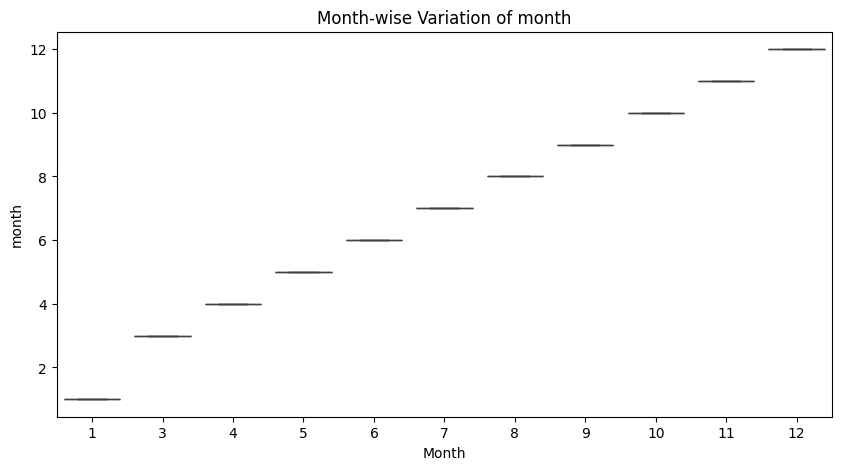

In [17]:

# Extract month
Merged['month'] = Merged['DateTime'].dt.month

# Plot each column month-wise
for column in Merged.select_dtypes(include=[float, int]).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=Merged['month'], y=Merged[column])
    plt.title(f'Month-wise Variation of {column}')
    plt.xlabel('Month')
    plt.ylabel(column)
    plt.show()

# DAILY VARIATION

Index(['hour', 'testo 160 IAQ_51616135_outdoor [ppm]',
       'testo 160 IAQ_51616135_outdoor [°C]',
       'testo 160 IAQ_51616135_outdoor [mbar]',
       'testo 160 IAQ_51616135_outdoor [%RH]',
       'testo 160 IAQ_51616135_outdoor [°C td]',
       'testo 160 IAQ_51616135_outdoor [g/m³]', 'DateTime',
       'testo 160 IAQ_51616142 [ppm]', 'testo 160 IAQ_51616142 [°C]',
       'testo 160 IAQ_51616142 [mbar]', 'testo 160 IAQ_51616142 [%RH]',
       'testo 160 IAQ_51616142 [°C td]', 'testo 160 IAQ_51616142 [g/m³]',
       'Computer - kWatts', 'Plug Load (kWatts)', 'Air Conditioner-kWatts',
       'light + fan - kWatts ', 'month'],
      dtype='object')


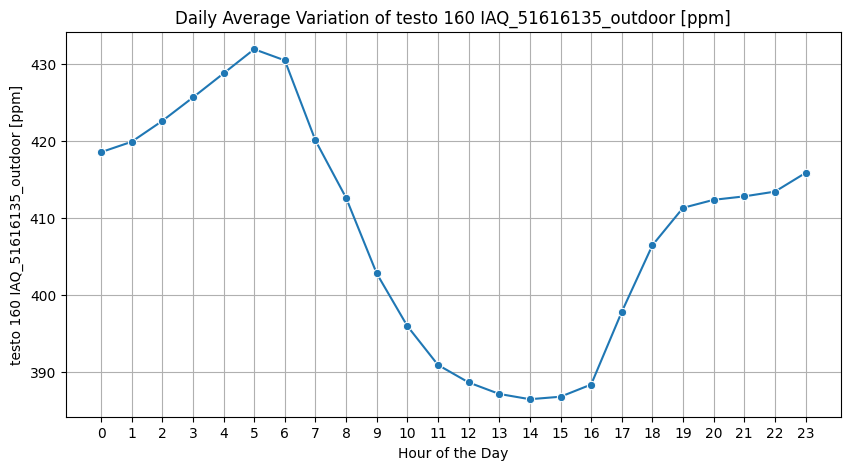

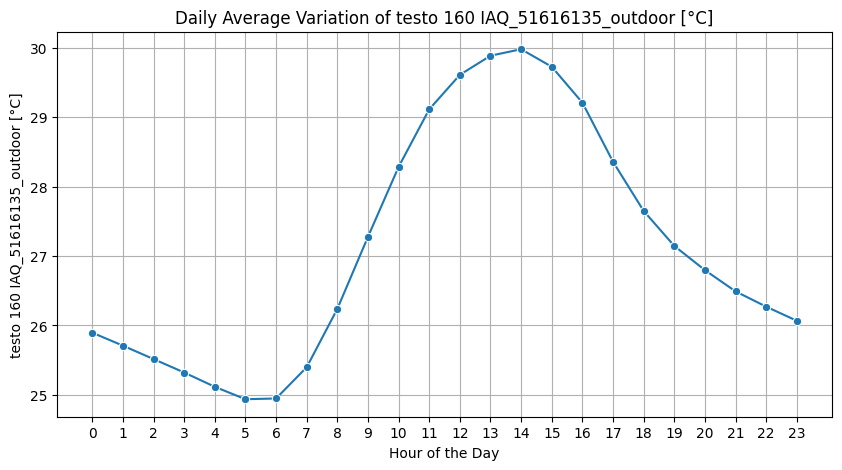

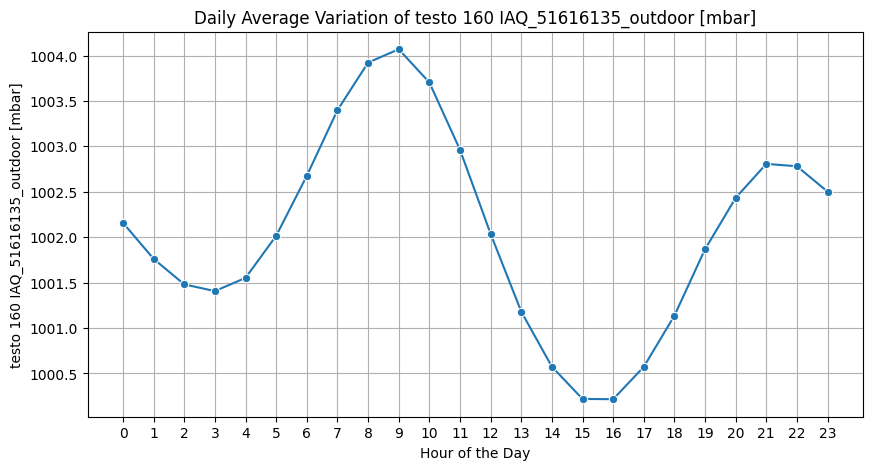

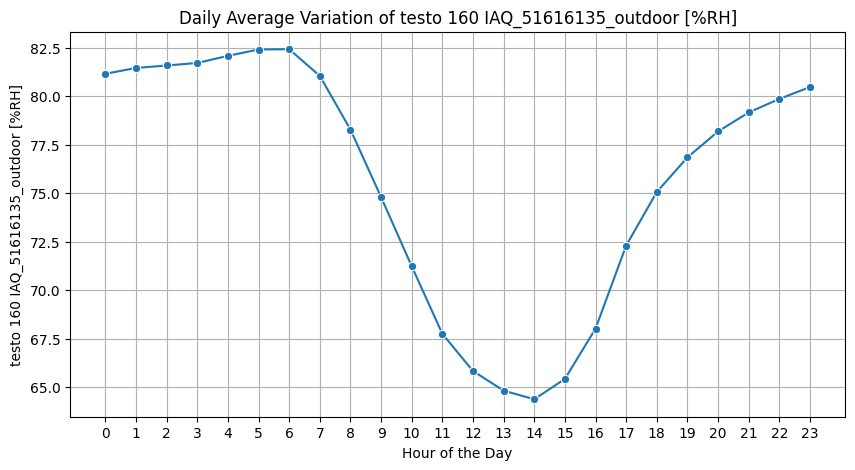

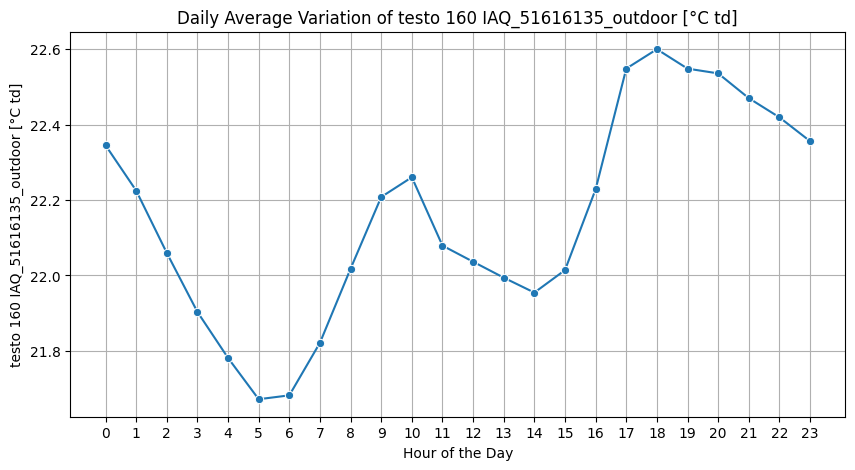

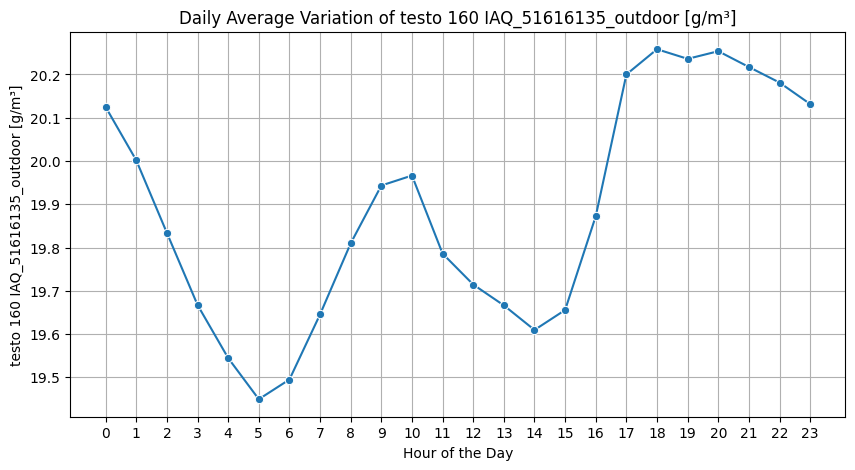

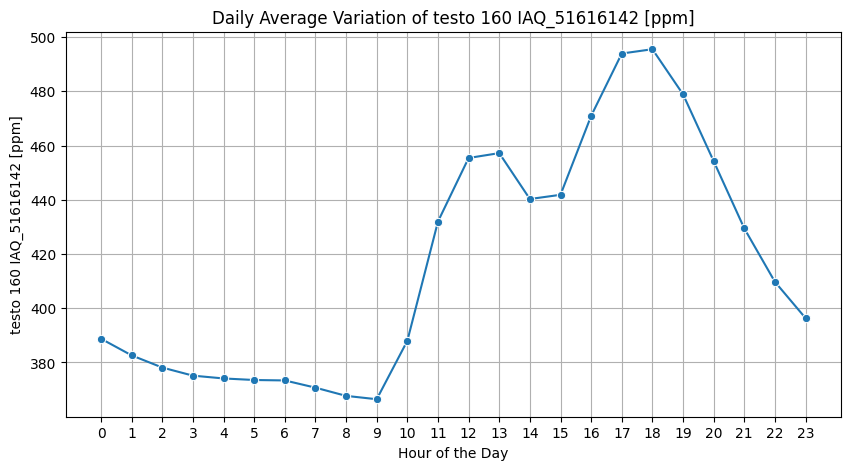

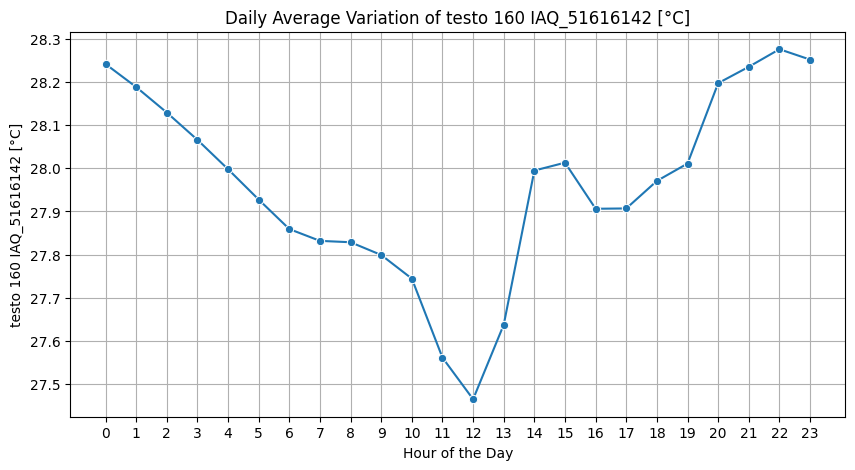

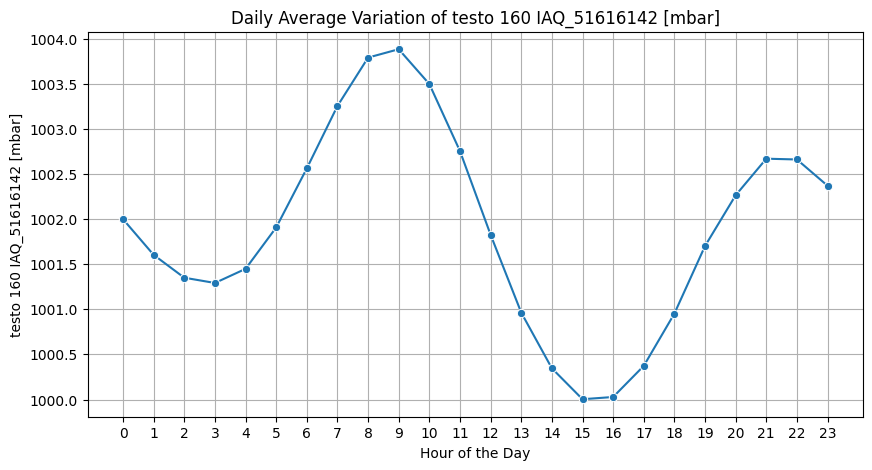

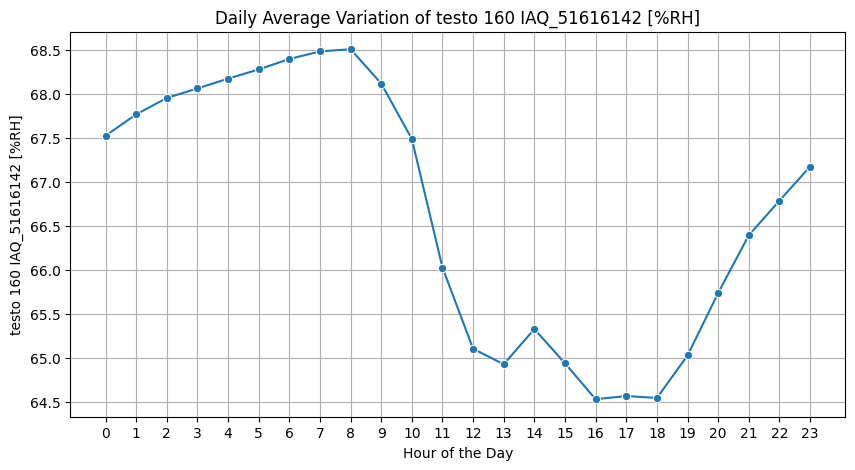

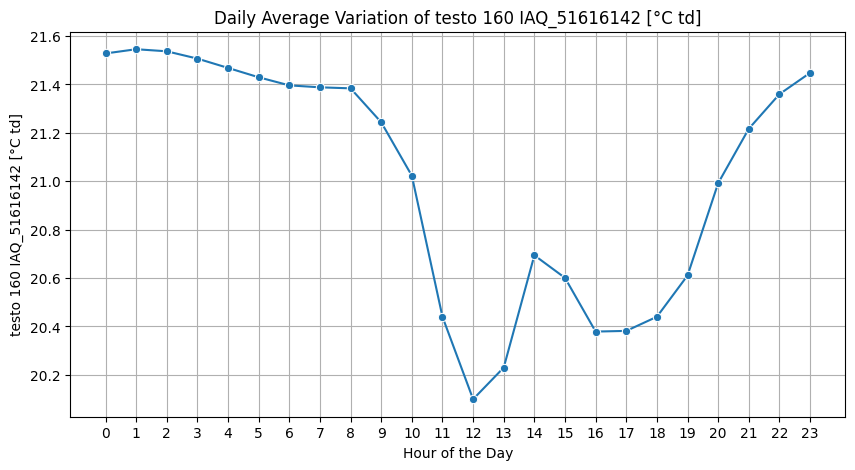

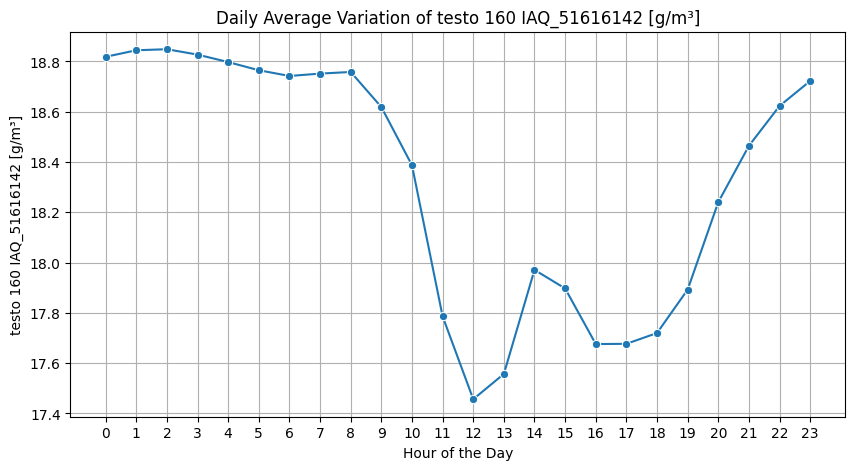

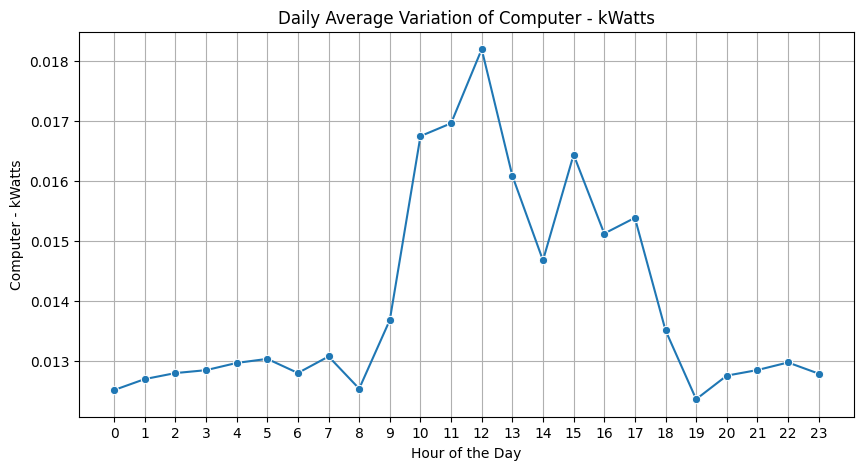

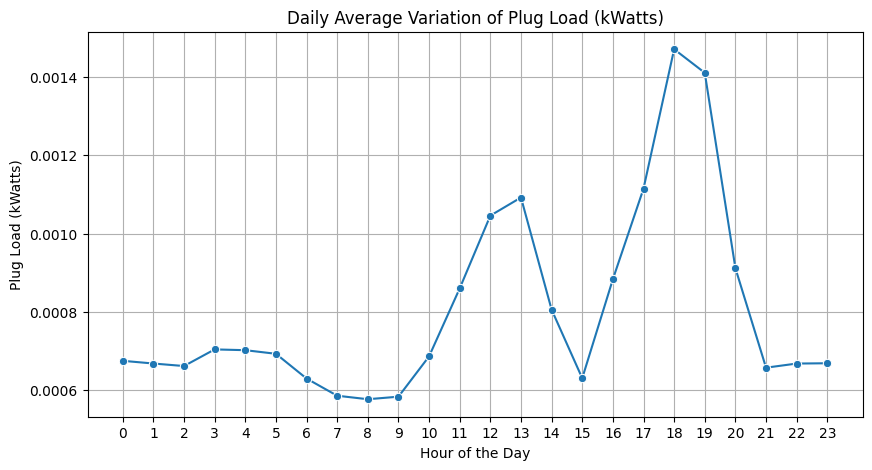

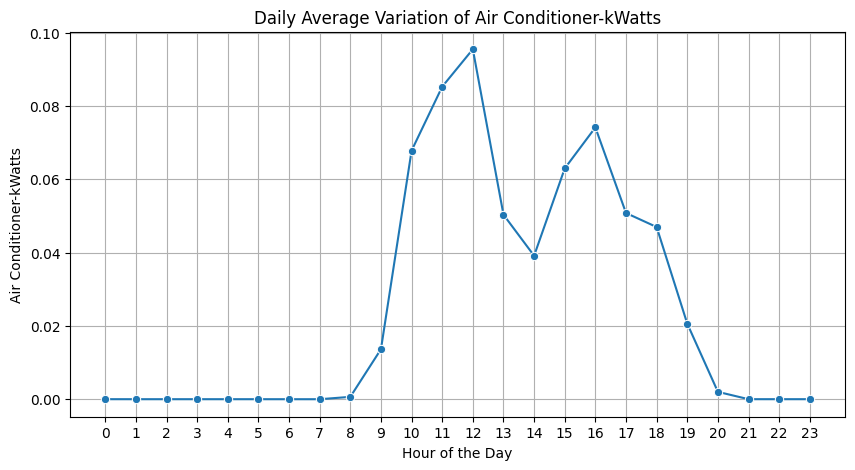

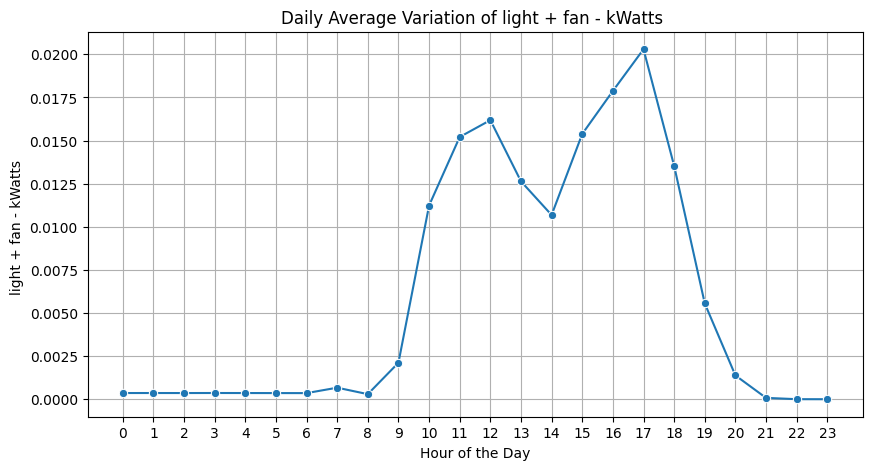

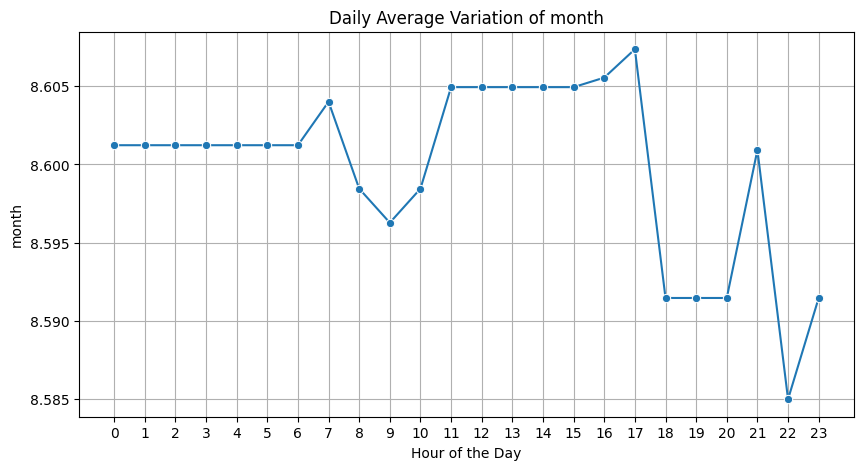

In [20]:


# Ensure DateTime is in proper format
Merged['DateTime'] = pd.to_datetime(Merged['DateTime'])

# Extract hour
Merged['hour'] = Merged['DateTime'].dt.hour

# Compute daily average for each hour
hourly_avg = Merged.groupby('hour').mean().reset_index()  # Reset index ensures 'hour' is available

# Print column names to check if 'hour' exists
print(hourly_avg.columns)

# Plot each numerical column's daily variation
for column in Merged.select_dtypes(include=[float, int]).columns:
    if column != 'hour':  # Avoid plotting the 'hour' column itself
        plt.figure(figsize=(10, 5))
        sns.lineplot(x=hourly_avg['hour'], y=hourly_avg[column], marker='o')
        plt.xticks(range(0, 24, 1))
        plt.title(f'Daily Average Variation of {column}')
        plt.xlabel('Hour of the Day')
        plt.ylabel(column)
        plt.grid(True)
        plt.show()


# CLUSTER CO2 CONCENTRATION

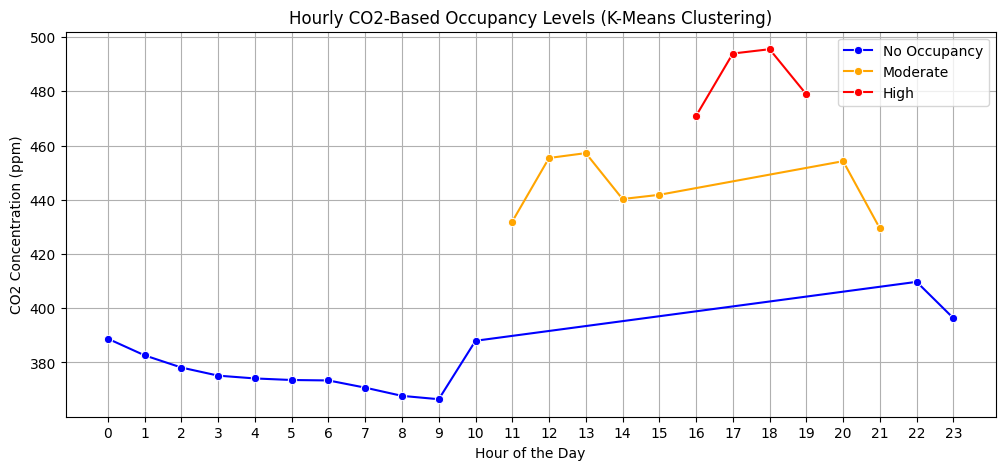

In [22]:
from sklearn.cluster import KMeans
co2_column = 'testo 160 IAQ_51616142 [ppm]'
df = Merged

# Ensure DateTime is in datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract the hour from DateTime
df['hour'] = df['DateTime'].dt.hour

# Compute average CO2 levels per hour
hourly_avg = df.groupby('hour')[co2_column].mean().reset_index()

# Apply K-Means clustering with 3 clusters (No Occupancy, Moderate, High)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
hourly_avg['Cluster'] = kmeans.fit_predict(hourly_avg[[co2_column]])

# Sort clusters by CO2 levels to label them meaningfully
sorted_clusters = np.argsort(kmeans.cluster_centers_.flatten())  # Sort cluster centers by CO2 value
cluster_labels = {sorted_clusters[0]: 'No Occupancy', sorted_clusters[1]: 'Moderate', sorted_clusters[2]: 'High'}

# Map cluster labels
hourly_avg['Occupancy_Level'] = hourly_avg['Cluster'].map(cluster_labels)

# Plot CO2-based occupancy variation over 24 hours
plt.figure(figsize=(12, 5))
sns.lineplot(data=hourly_avg, x='hour', y=co2_column, marker='o', hue='Occupancy_Level', palette={'No Occupancy': 'blue', 'Moderate': 'orange', 'High': 'red'})
plt.xticks(range(0, 24, 1))
plt.xlabel('Hour of the Day')
plt.ylabel('CO2 Concentration (ppm)')
plt.title('Hourly CO2-Based Occupancy Levels (K-Means Clustering)')
plt.legend()
plt.grid(True)
plt.show()


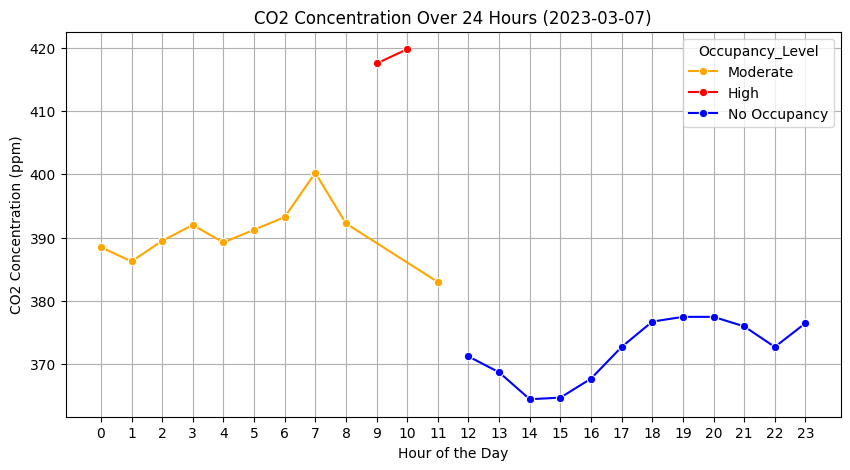

In [27]:

# Define CO2 column (change this to the correct column name)
co2_column = 'testo 160 IAQ_51616142 [ppm]'

# Use the correct DataFrame
df = Merged

# Ensure DateTime is in datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract hour from DateTime
df['hour'] = df['DateTime'].dt.hour

# Specify the date you want to analyze (format: YYYY-MM-DD)
selected_date = "2023-03-07"

# Filter for the selected date
df_selected = df[df['DateTime'].dt.date == pd.to_datetime(selected_date).date()].copy()
df_selected['hour'] = df_selected['DateTime'].dt.hour  # Avoid SettingWithCopyWarning

# Compute average CO2 per hour
hourly_avg = df_selected.groupby('hour')[co2_column].mean().reset_index()

# Apply K-Means clustering with 3 clusters (No Occupancy, Moderate, High)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
hourly_avg['Cluster'] = kmeans.fit_predict(hourly_avg[[co2_column]])

# Sort clusters by CO2 levels to label them meaningfully
sorted_clusters = np.argsort(kmeans.cluster_centers_.flatten())  # Sort cluster centers by CO2 value
cluster_labels = {sorted_clusters[0]: 'No Occupancy', sorted_clusters[1]: 'Moderate', sorted_clusters[2]: 'High'}

# Map cluster labels
hourly_avg['Occupancy_Level'] = hourly_avg['Cluster'].map(cluster_labels)

# Plot the 24-hour CO₂ variation
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_avg, x='hour', y=co2_column, marker='o', hue='Occupancy_Level',
             palette={'No Occupancy': 'blue', 'Moderate': 'orange', 'High': 'red'})
plt.xticks(range(0, 24, 1))
plt.xlabel('Hour of the Day')
plt.ylabel('CO2 Concentration (ppm)')
plt.title(f'CO2 Concentration Over 24 Hours ({selected_date})')
plt.grid(True)
plt.show()


In [28]:
from sklearn.preprocessing import MinMaxScaler
df = Merged
# Select numerical columns
numerical_cols = df.select_dtypes(include=[float, int]).columns

# Initialize MinMaxScaler with range (-1,1)
scaler = MinMaxScaler(feature_range=(-1, 1))

# Scale the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Save to an Excel file
df.to_excel("scaled_data.xlsx", index=False)

print("Data scaled between -1 and 1 and saved to 'scaled_data.xlsx'")


Data scaled between -1 and 1 and saved to 'scaled_data.xlsx'
